<a href="https://colab.research.google.com/github/fabricio-franca/Data-Science/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introdução do Problema**

O dataset 'Adult' (Census Income) do UCI Machine Learning Repository e amplamente utilizado
para analise de
classificacao em Machine Learning.

Ele contem informacoes sobre individuos coletadas a partir de
um censo nos EUA
e tem como objetivo prever se uma pessoa ganha mais de 50K por ano com base em diferentes
caracteristicas.


📍 Problemas do dataset:
- Contem valores ausentes em colunas como 'workclass', 'occupation' e 'native-country'.
- Possui variaveis categoricas que precisam ser transformadas em formato numerico.
- Algumas features numericas podem conter outliers que afetam a modelagem.
- A escala das variaveis numericas varia bastante, o que pode impactar modelos sensiveis a
magnitude.

📍 Objetivo do pipeline:

O objetivo do pipeline e tratar esses problemas aplicando tecnicas de pre-processamento para
limpar, transformar
e preparar os dados para treinamento de modelos de Machine Learning de forma eficiente e
automatizada

# **2. Coleta de Dados**

In [ ]:
pip install sweetviz

In [ ]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt


Aqui importamos as bibliotecas necessárias:

- pandas e numpy: Para manipulação de dados.
- train_test_split: Para dividir os dados em conjunto de treino e teste.
- StandardScaler, OneHotEncoder, LabelEncoder: Para normalização e codificação de variáveis.
- SimpleImputer: Para tratamento de valores ausentes.
- Pipeline: Para encadear várias etapas de pré-processamento.
- ColumnTransformer: Para aplicar diferentes transformações a diferentes colunas.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, names=columns)
# df = pd.read_csv(url, names=columns, na_values=' ?')


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


# **3. Limpeza dos Dados**

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# Identificar colunas que contêm o valor " ?"
missing_values = (df == ' ?').sum()

# Filtrar apenas colunas que possuem valores " ?"
missing_columns = missing_values[missing_values > 0]

# Exibir o resultado
print("Colunas com valores ' ?' e suas respectivas contagens:")
print(missing_columns)

Colunas com valores ' ?' e suas respectivas contagens:
workclass         1836
occupation        1843
native-country     583
dtype: int64


In [ ]:
# Substituir ' ?' por NaN
df.replace(' ?', np.nan, inplace=True)

# Verificar a contagem de valores ausentes por coluna
missing_values_count = df.isna().sum()

print("Contagem de valores ausentes por coluna:")
print(missing_values_count)

Contagem de valores ausentes por coluna:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


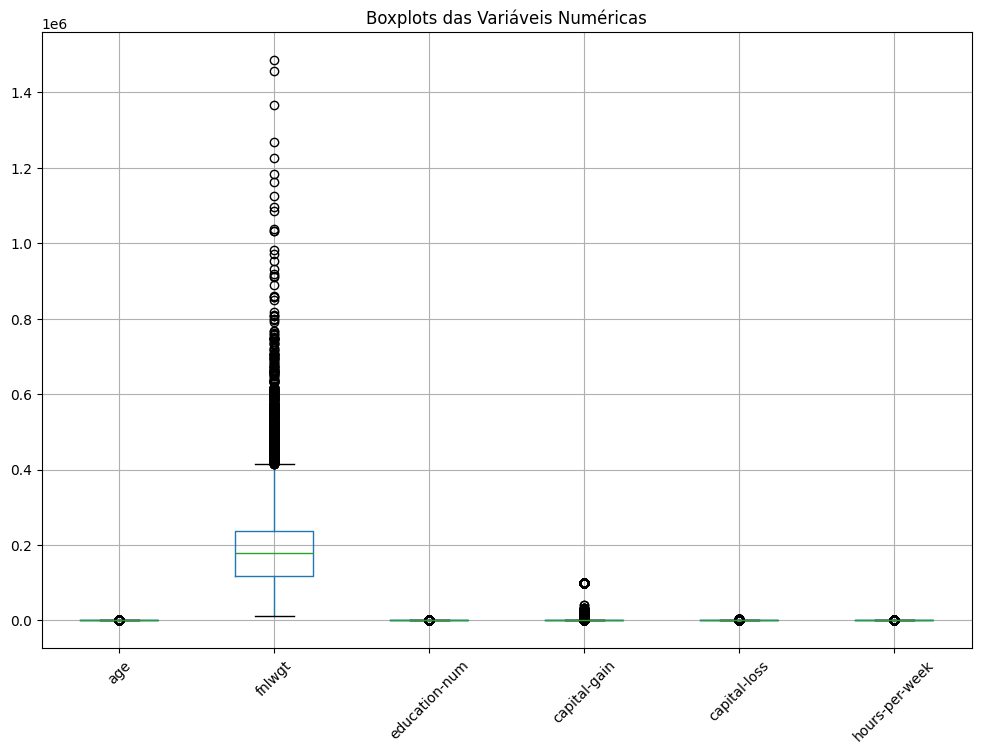

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Criar boxplots para cada coluna numérica
plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot()
plt.title('Boxplots das Variáveis Numéricas')
plt.xticks(rotation=45)
plt.show()

# Explicação do Código

## Importação das Bibliotecas

- `pandas` é utilizado para manipulação de dados.
- `matplotlib.pyplot` é utilizado para criação de visualizações.

## Carregamento do Dataset

O dataset é carregado a partir da URL fornecida, com nomes de colunas definidos e valores ausentes representados por `' ?'` são substituídos por `NaN`.

## Seleção de Colunas Numéricas

As colunas numéricas relevantes são selecionadas para análise.

## Criação de Boxplots

Um boxplot é gerado para cada coluna numérica selecionada. O gráfico é ajustado para melhor visualização, incluindo título e rotação dos rótulos do eixo x.

## Interpretação dos Boxplots

- **Caixa (Box):** Representa o intervalo interquartil (IQR), que contém 50% dos dados centrais.
- **Linha no Meio da Caixa:** Indica a mediana dos dados.
- **Extensões (Whiskers):** Estendem-se até 1,5 vezes o IQR a partir dos quartis inferior e superior.
- **Pontos Fora das Extensões:** Considerados outliers, representam valores que estão além de 1,5 vezes o IQR.

Ao analisar os boxplots, os pontos que aparecem fora das extensões são identificados como *outliers*. Esses valores podem exigir atenção especial, pois podem influenciar análises estatísticas e modelos preditivos. Dependendo do contexto, você pode optar por investigar, transformar ou remover esses outliers.

Para uma compreensão mais aprofundada sobre a detecção de outliers usando IQR e boxplots, você pode assistir ao seguinte vídeo:


In [ ]:
# Mapear a variável 'income' para 0 e 1
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})

# **4. Análise de Dados**

In [ ]:

# Gerar o relatório do Sweetviz considerando 'income' como variável alvo
report = sv.analyze(df, target_feat='income')

# Salvar o relatório em HTML
report_filename = "./sweetviz_analysis_adult.html"
report.show_html(report_filename)

# Exibir o arquivo para download
report_filename

                                             |          | [  0%]   00:00 -> (? left)

Report ./sweetviz_analysis_adult.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


'./sweetviz_analysis_adult.html'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

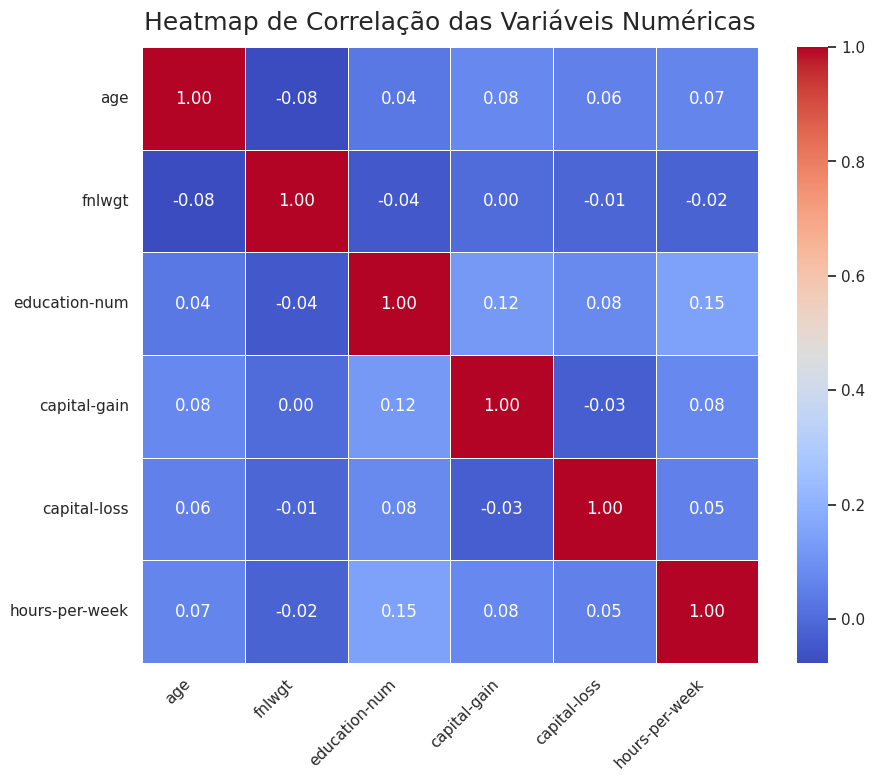

In [ ]:

# Calcular a matriz de correlação
correlation_matrix = df[numeric_columns].corr()

# Configurar o estilo do Seaborn
sns.set_theme(style='white')

# Criar o heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Adicionar título e ajustar fonte
heatmap.set_title('Heatmap de Correlação das Variáveis Numéricas', fontdict={'fontsize':18}, pad=12)

# Ajustar os rótulos dos eixos
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Mostrar o gráfico
plt.show()


# **Engenharia de Features**

In [ ]:
#Separando target de features

X = df.drop(columns=['income'])
y = df['income']

In [ ]:
#Separação das features (X) e do alvo (y)

X = df.drop(columns=['income'])
y = df['income']


- X: Contém as features (dados de entrada, sem a variável-alvo).
- y: Contém a variável-alvo (income), que será usada para prever se uma pessoa ganha mais ou menos de 50K por ano.

In [ ]:
# Identificação dos tipos de colunas

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns


- num_features: Identifica as colunas numéricas.
- cat_features: Identifica as colunas categóricas.

Isso nos ajuda a aplicar transformações diferentes para cada tipo de dado.

In [ ]:
num_features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

##  Criando pipelines de pré-processamento
Pipeline para features numéricas

In [ ]:

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


Esse pipeline é aplicado somente às colunas numéricas. Ele faz:

- SimpleImputer(strategy='median'): Preenche valores ausentes com a mediana da coluna.
- StandardScaler(): Normaliza os valores, transformando-os para uma distribuição com média 0 e desvio padrão 1.

📌 Por que usar a mediana?
A mediana é menos sensível a outliers do que a média.

📌 Por que usar o StandardScaler?
Modelos como regressão logística, SVM e redes neurais funcionam melhor quando as variáveis estão escalonadas.

## Pipeline para features categóricas



In [ ]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


Esse pipeline é aplicado somente às colunas categóricas. Ele faz:

- SimpleImputer(strategy='most_frequent'): Preenche valores ausentes com o valor mais frequente da coluna.
- OneHotEncoder(handle_unknown='ignore'): Faz codificação one-hot das categorias.

📌 Por que usar OneHotEncoder?
Modelos de Machine Learning não entendem dados categóricos. Então, transformamos cada categoria em uma coluna binária (0 ou 1).

## Combinação de pipelines



In [ ]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

Esse ColumnTransformer combina os pipelines e aplica cada um às colunas correspondentes.


## Transformação da variável-alvo


In [ ]:

y = LabelEncoder().fit_transform(y)


O income contém valores <=50K e >50K.

Com LabelEncoder(), transformamos em valores 0 e 1, facilitando o uso em modelos.



## Divisão entre treino e teste


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


80% dos dados são usados para treinamento.

20% dos dados são usados para teste.

O random_state=42 garante que a divisão seja sempre a mesma.


## Criando o pipeline final


In [ ]:

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])



Aqui criamos um pipeline final que aplica todos os pré-processamentos.

## Aplicação do pipeline


In [ ]:

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

💡fit_transform(X_train): Ajusta os transformadores ao conjunto de treino e aplica as transformações.

💡transform(X_test): Apenas aplica as transformações ao conjunto de teste.

📌 Resumo das Técnicas Utilizadas
Técnica	X O que faz?
* SimpleImputer	- Preenche valores ausentes
* StandardScaler - 	Normaliza variáveis numéricas
* OneHotEncoder	- Codifica variáveis categóricas
* LabelEncoder -	Transforma a variável-alvo em 0 e 1
* Pipeline	- Permite encadear transformações
* ColumnTransformer -	Aplica diferentes transformações a colunas específicas

🛠️ O que você pode modificar?
* Trocar StandardScaler por MinMaxScaler (normalização para faixa [0,1]).
* Testar diferentes estratégias de imputação (mean, most_frequent, etc.).
* Adicionar detecção e remoção de outliers com IsolationForest ou IQR.
